# Segmentación del mercado de adolecentes

En este tutorial se aplicó el algoritmo K-means para clasificar un grupo de adolecentes con base en sus intéreses, con el fin de diseñar estrategias publicitarias y servicios encaminados a cada grupo de interés

## Descripción del problema

Un vendedor desea enviar publicidad electrónica a una población de adolecentes y adultos jóvenes con el fin de maximizar sus ventas. Para ello, desea poder clasificar a sus clientes potenciales por grupos de interés de acuerdo con sus intereses y consecuentemente enviar publicidad específica a cada uno de ellos.

En este problema se desea determina que grupos de interés existen en una población de clientes a partir de los mensajes enviados por un servicio de redes sociales. La información disponible consiste en 30000 observaciones de 40 variables que podrían caracterizar los intereses de la población analizada. Estas variables corresponden a palabras que pueden asociarse a un interés de la poblaión analizada. Cada variable mide la frecuencia con que una determinada palabra aparece en los mensajes de texto; adicionalmente, dentro de estas variables se incluye información como el sexo, la edad y la cantidad de contactos de la persona.

### Preparación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/snsdata.csv",
    sep = ',',
    thousands = None,
    decimal = '.',
    encoding='latin-1')

df.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Análisis exploratorio

In [3]:
# Número de registros
len(df)

30000

In [4]:
# Valores diferentes de Na
df.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [5]:
#Número de registros con NA
df.gender.isna().sum()

2724

In [6]:
df.age.describe() #Hay datos por fuera de la población de interés

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [7]:
# Cantidad de nulos en la columna age
df.age.isnull().sum()

5086

In [8]:
#Selección de edades mayores a 13 y menores iguales a 20
## Opción 1
df["age"] = df["age"].map(lambda x: np.nan if x < 13 else x)
df["age"] = df["age"].map(lambda x: np.nan if x >=20 else x)



In [9]:
#Opcion 2.

df[(df["age"] > 13) & (df["age"] <= 20)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.age.describe()

count    24477.000000
mean        17.252429
std          1.157465
min         13.027000
25%         16.304000
50%         17.265000
75%         18.220000
max         19.995000
Name: age, dtype: float64

In [11]:
#Creación de variables numéricas a partir de información categórica

df["female"] = df["gender"].map(lambda x: 1 if x == "F" else 0)
df["no_gender"] = df["gender"].map(lambda x: 1 if pd.isnull(x) else 0)

#Cantidad de hombres y mujeres en la muestra
df.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [12]:
# Número de registros con Na

df.gender.isna().sum()

2724

In [13]:
# Cantidad de patrones para los que se conoce y no se conoce el genero

df.no_gender.value_counts()

0    27276
1     2724
Name: no_gender, dtype: int64

In [14]:
# Edad promedio sin tener en cuenta los datos faltantes
df.age.mean()

17.25242893328433

In [15]:
# Se calcula una tabla para determinar
# La edad promedio por año de graduación

df.groupby("gradyear")["age"].mean()

gradyear
2006    18.655858
2007    17.706172
2008    16.767701
2009    15.819573
Name: age, dtype: float64

In [16]:
# Los valores faltantes se llenan con el promedio
# de acuerdo con el año de graduación

ave_age = df.groupby("gradyear")["age"].mean()
df.age = [x if not pd.isnull(x) else ave_age[y] for x, y in zip(df.age, df.gradyear)]
df.age.describe()

count    30000.000000
mean        17.237326
std          1.141821
min         13.027000
25%         16.282000
50%         17.238000
75%         18.212000
max         19.995000
Name: age, dtype: float64

### Entrenamiento del modelo

In [17]:
## Se separa la información de las palabras relacionadas

interests = df.iloc[:, 4:].copy()
interests.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,1


In [18]:
## Se escalan los datos, con el fin de eliminar los problemas asociados a la medida de los datos.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
interests_z = scaler.fit_transform(interests)
interests_z

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [19]:
# Se usa el algoritmo para determinar los centros de 5 cluster

from sklearn.cluster import KMeans
df_clusters = KMeans(n_clusters = 5, random_state = 1).fit(interests_z)

## Evaluación del modelo

In [20]:
# Número de patrones asignados a cada grupo

(pd.DataFrame(df_clusters.predict(interests_z)))[0].value_counts()

4    17115
1     5222
0     4280
2     2724
3      659
Name: 0, dtype: int64

In [21]:
# Frecuencia de las palabras en cada cluster

df_clusters.cluster_centers_

array([[ 2.00247889e-02,  2.70663878e-02,  1.30227834e-02,
         1.94665828e-02,  2.09986388e-02,  8.86103469e-03,
         8.96015700e-03,  8.51150360e-03,  8.93949957e-03,
         1.93469672e-02,  4.51881117e-02,  4.34009728e-03,
         1.38017404e-02,  3.41389728e-02,  1.14320957e-02,
         2.90804865e-02,  6.29581898e-03,  3.88735132e-03,
         1.82757669e-02,  2.11259033e-02,  7.96912369e-03,
         1.04366932e-02,  4.53172205e-03,  2.21832548e-03,
         3.09023874e-02,  3.89134196e-02,  9.23187791e-04,
         6.91571772e-02,  1.28620624e-01,  8.00894725e-02,
         2.73194412e-02,  2.27457588e-02,  1.41127754e-02,
         1.36947645e-02,  2.62897978e-02,  9.17964211e-03,
         1.00000000e+00, -1.26287869e-15],
       [ 1.31415167e-02,  2.98991446e-02,  7.78047293e-03,
         5.40698853e-04,  2.47578924e-03,  2.57595038e-03,
         9.57487553e-04,  1.69714669e-02,  6.88114388e-03,
         1.66443253e-02,  3.95761522e-03,  1.40767468e-03,
         4.57

In [22]:
import seaborn as sns

In [23]:
df["cluster"] = df_clusters.predict(interests_z)

In [79]:
df3 = df.reset_index()
df4 = pd.pivot_table(df3, index = "index", columns = "cluster", fill_value=0)

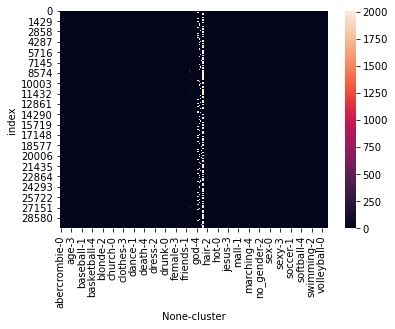

In [56]:
sns.heatmap(df4)

In [63]:
df4 = df3[['basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports', "cluster"]]

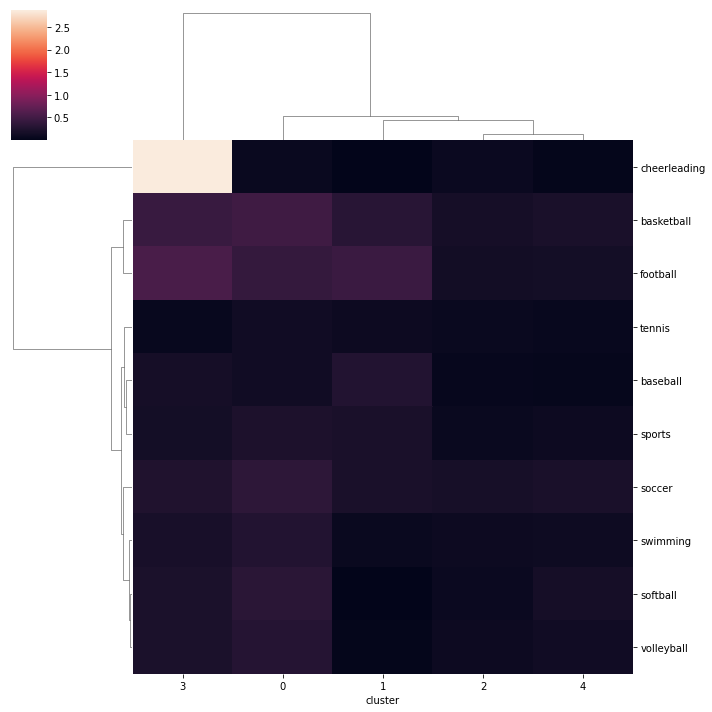

In [75]:
b

In [76]:
pd.pivot_table(df4, columns = "cluster")

cluster,0,1,2,3,4
baseball,0.136682,0.271543,0.060573,0.176024,0.050482
basketball,0.481776,0.315396,0.172907,0.440061,0.207420
cheerleading,0.080607,0.008617,0.088840,2.877086,0.039205
football,0.405140,0.448487,0.147577,0.559939,0.159042
soccer,0.352570,0.210073,0.177313,0.253414,0.200234
softball,0.324299,0.009192,0.089941,0.213961,0.176103
sports,0.232009,0.199732,0.076358,0.163885,0.107917
swimming,0.274766,0.079854,0.102790,0.195751,0.118609
tennis,0.134579,0.103217,0.080029,0.072838,0.072393
volleyball,0.294393,0.034661,0.101322,0.210926,0.142448


In [88]:
df2 = df[["soccer", "cluster"]]
df2[df2["soccer"] == 1]["cluster"].value_counts()

4    898
0    356
1    263
2    121
3     46
Name: cluster, dtype: int64

## Análisis del modelo

In [91]:
# Se asigna a cada ejemplo de los datos el cluster al que pertenece

df["cluster"] = df_clusters.predict(interests_z).tolist()

# Clusters a los que pertenecen los primeros cinco patrones

df[["cluster", "gender", "age", "friends"]].head()

,cluster,gender,age,friends
0,1,M,18.982,7
1,0,F,18.801,0
2,1,M,18.335,69
3,4,F,18.875,0
4,2,NaN,18.995,10


In [95]:
# Características demográficas de los clusters, Edad por cluster

df.groupby("cluster")["age"].mean()

cluster
0    17.057881
1    17.432631
2    17.269795
3    16.990936
4    17.226930
Name: age, dtype: float64

In [96]:
# Promedio de mujeres por cluster

df.groupby("cluster")["female"].mean()

cluster
0    1
1    0
2    0
3    1
4    1
Name: female, dtype: int64

In [98]:
## Se encontraron NaN en genero, se definen mediante la variable "female" == 0
df["gender"] = df["gender"].map(lambda x: x if x == "M" else "M")

In [119]:
## Número de mujeres por cluster
for a, b in df.groupby("cluster"):
    print((b["female"]).sum())


4280
0
0
659
17115


In [120]:
## Cantidad promedio de amigos por cluster

df.groupby("cluster")["friends"].mean()

cluster
0    37.749299
1    24.926465
2    26.139134
3    40.025797
4    30.153141
Name: friends, dtype: float64

In [122]:
## Cantidad de friends por cluster

for a, b in df.groupby("cluster"):
    print((b["friends"]).sum())

161567
130166
71203
26377
516071


In [133]:
from sklearn.preprocessing import normalize
data_scaled = normalize(interests)
data_scaled = pd.DataFrame(data_scaled, columns=interests.columns)
data_scaled.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.124035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.124035,0.000000
2,0.0,0.377964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.377964,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.577350,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.294884,0.0,0.0,0.0,0.0,0.000000,0.147442,0.147442,0.000000,0.147442


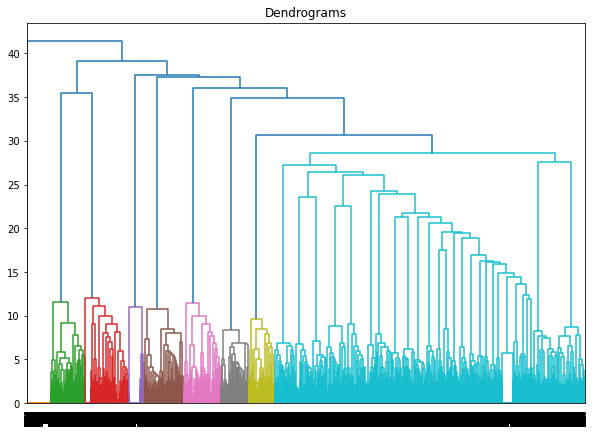

In [134]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))